In [1]:
!pip install autogluon

In [63]:
import pandas as pd
from autogluon.tabular import TabularPredictor, TabularDataset
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
!unzip "/content/drive/MyDrive/Data_Expression_mRNA_9classes.zip"

Archive:  /content/drive/MyDrive/Data_Expression_mRNA_9classes.zip
replace Data_Expression_mRNA_9classes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
# Load data from CSV into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Data_Expression_mRNA_9classes.csv')

In [6]:
# Split data into train and test sets
train_data = df.sample(frac=0.8, random_state=42)
test_data = df.drop(train_data.index)

In [30]:
subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head()

,Classes,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,...,gen2996,gen2997,gen2998,gen2999,gen3000,gen3001,gen3002,gen3003,gen3004,gen3005
1114,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4642,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2796,3,10,4,10,0,0,1,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3287,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3133,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
label = 'Classes'
print(f"Unique classes: {list(train_data[label].unique())}")

Unique classes: [1, 7, 3, 4, 6, 2, 8, 5, 9]


In [32]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20240501_105139"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240501_105139"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

In [33]:
test_data.head()

,Classes,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,...,gen2996,gen2997,gen2998,gen2999,gen3000,gen3001,gen3002,gen3003,gen3004,gen3005
0,1,0,0,0,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,1,0,2,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,3,1,6,4,1,2,1,0,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y_pred = predictor.predict(test_data)
y_pred.head()  # Predictions

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [35]:
y_pred_proba = predictor.predict_proba(test_data)
y_pred_proba.head()  # Prediction Probabilities

,1,2,3,4,5,6,7,8,9
0,0.622302,0.017133,0.147652,0.009068,0.006516,0.065318,0.025781,0.087042,0.019188
1,0.845949,0.031828,0.014277,0.024923,0.007024,0.047646,0.012124,0.006636,0.009593
2,0.755916,0.070504,0.168894,0.001332,0.000423,0.000883,0.000837,0.000581,0.000629
3,0.832011,0.018405,0.010869,0.019289,0.043242,0.018554,0.012803,0.033854,0.010973
4,0.669073,0.017051,0.300746,0.004865,0.000925,0.001403,0.002344,0.002748,0.000845


In [36]:
predictor.evaluate(test_data)

{'accuracy': 0.8303321328531412,
 'balanced_accuracy': 0.7608954292182257,
 'mcc': 0.7932367093242129}

In [37]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.830332,0.85,accuracy,7.597024,2.193620,399.869061,0.007434,0.000814,0.156488,2,True,14
1,NeuralNetTorch,0.816327,0.81,accuracy,4.676381,2.072989,10.020425,4.676381,2.072989,10.020425,1,True,12
2,LightGBMXT,0.793517,0.76,accuracy,1.482720,0.045933,18.064263,1.482720,0.045933,18.064263,1,True,4
3,NeuralNetFastAI,0.791317,0.69,accuracy,0.562980,0.016079,3.679327,0.562980,0.016079,3.679327,1,True,3
4,LightGBM,0.771709,0.73,accuracy,0.888812,0.025714,23.492802,0.888812,0.025714,23.492802,1,True,5
5,CatBoost,0.762905,0.74,accuracy,0.541677,0.048171,348.135083,0.541677,0.048171,348.135083,1,True,8
6,RandomForestGini,0.754302,0.65,accuracy,0.247406,0.077652,2.422676,0.247406,0.077652,2.422676,1,True,6
7,ExtraTreesGini,0.743697,0.70,accuracy,0.274703,0.069414,3.450505,0.274703,0.069414,3.450505,1,True,9
8,RandomForestEntr,0.743497,0.68,accuracy,0.239401,0.057839,3.127333,0.239401,0.057839,3.127333,1,True,7
9,XGBoost,0.733493,0.64,accuracy,1.095338,0.020054,27.956362,1.095338,0.020054,27.956362,1,True,11


In [4]:
# Display summary statistics
print(df.describe())

           Classes         gen1         gen2         gen3         gen4  \
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.000000   
mean      3.514006     2.765306     2.827931     3.970788     4.295318   
std       2.108832    15.351552    15.632870    20.972874    23.376756   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     0.000000   
50%       3.000000     0.000000     0.000000     0.000000     0.000000   
75%       5.000000     2.000000     2.000000     3.000000     3.000000   
max       9.000000   822.000000   869.000000  1237.000000  1252.000000   

              gen5         gen6         gen7         gen8        gen9  ...  \
count  4998.000000  4998.000000  4998.000000  4998.000000  4998.00000  ...   
mean      2.683874     3.149260     3.923770     2.410964     2.85034  ...   
std       9.013659    13.078286    18.812813     7.135077    10.03827  ...   
min       0.000000   

In [5]:
# Initialize AutoGluon
predictor = TabularPredictor(label='gen10')



No path specified. Models will be saved in: "AutogluonModels/ag-20240501_094718"


In [7]:
# Fit AutoGluon to the training data
predictor.fit(train_data)

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240501_094718"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
O

In [8]:
# Display the first few rows of the dataset
print(train_data.head())

      Classes  gen1  gen2  gen3  gen4  gen5  gen6  gen7  gen8  gen9  ...  \
84          1     0     0     0     0     0     0     0     0     0  ...   
2470        3     8     8    10    21    15    10    18     6     5  ...   
2803        3     0     0     1     5     0     2     2     3     3  ...   
4986        9     0     0     0     0     0     0     0     0     0  ...   
4923        9     0     0     0     0     0     0     0     0     0  ...   

      gen2996  gen2997  gen2998  gen2999  gen3000  gen3001  gen3002  gen3003  \
84          0        0        0        0        0        0        0        0   
2470        4        0        1        1        3        1        1        1   
2803        0        0        0        0        0        0        0        0   
4986        0        0        0        0        0        0        3        0   
4923        0        0        0        0        0        1        0        0   

      gen3004  gen3005  
84          0        0  
2470        

In [9]:
# Check the dimensions of the dataset
print(train_data.shape)

(3998, 3006)


In [10]:
# Display data types of each column
print(train_data.dtypes)

Classes    int64
gen1       int64
gen2       int64
gen3       int64
gen4       int64
           ...  
gen3001    int64
gen3002    int64
gen3003    int64
gen3004    int64
gen3005    int64
Length: 3006, dtype: object


In [11]:
# Summarize the distribution of numerical features
print(train_data.describe())

           Classes         gen1         gen2         gen3         gen4  \
count  3998.000000  3998.000000  3998.000000  3998.000000  3998.000000   
mean      3.503002     2.680590     2.796148     3.904202     4.255878   
std       2.112040    15.382888    16.693463    22.252550    24.862289   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     0.000000   
50%       3.000000     0.000000     0.000000     0.000000     0.000000   
75%       5.000000     2.000000     2.000000     3.000000     3.000000   
max       9.000000   822.000000   869.000000  1237.000000  1252.000000   

              gen5         gen6         gen7         gen8         gen9  ...  \
count  3998.000000  3998.000000  3998.000000  3998.000000  3998.000000  ...   
mean      2.602051     3.156328     3.816408     2.388194     2.748124  ...   
std       8.567731    14.047716    18.631470     7.183842     9.443952  ...   
min       0.00000

In [12]:
# Count the frequency of unique values in categorical features
print(train_data['gen10'].value_counts())

gen10
0      2499
1       341
2       209
3       174
4       116
       ... 
43        1
55        1
39        1
58        1
148       1
Name: count, Length: 69, dtype: int64


In [13]:
# Check for missing values
print(train_data.isnull().sum())

Classes    0
gen1       0
gen2       0
gen3       0
gen4       0
          ..
gen3001    0
gen3002    0
gen3003    0
gen3004    0
gen3005    0
Length: 3006, dtype: int64


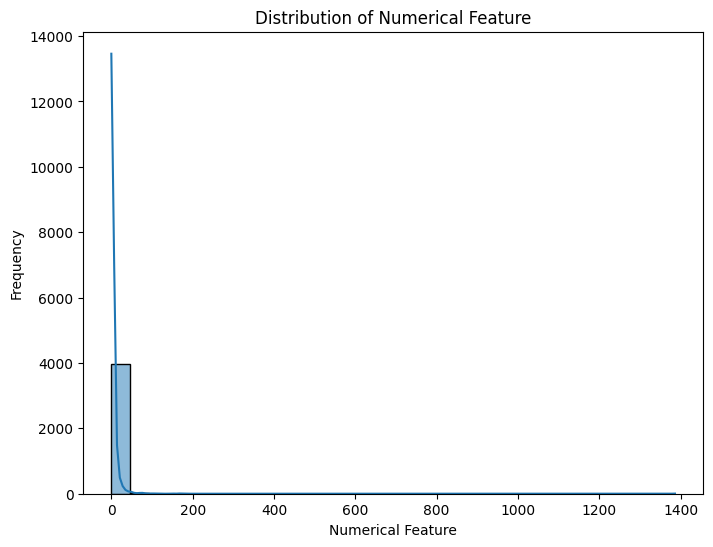

In [17]:
# Visualize the data (e.g., histograms, scatter plots)
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of a numerical feature
plt.figure(figsize=(8, 6))
sns.histplot(train_data['gen19'], bins=30, kde=True)
plt.xlabel('Numerical Feature')
plt.ylabel('Frequency')
plt.title('Distribution of Numerical Feature')
plt.show()

In [64]:
# Split the dataset into features and labels
X_train = train_data.drop(columns=['gen10'])
y_train = train_data['gen10']

In [75]:
# Initialize AutoGluon without parameter optimization
predictor_no_opt = TabularPredictor(label='gen10')
predictor_no_opt.fit(train_data)


No path specified. Models will be saved in: "AutogluonModels/ag-20240501_115352"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240501_115352"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

In [81]:
# Make predictions
y_pred_no_opt = predictor_no_opt.predict(X_train)
y_pred_no_opt


2718    0.295652
1239    8.435118
2587    5.131475
1551    0.172464
1419    8.324318
          ...   
3352    0.007391
4140    0.002464
1680    9.754681
534     3.587617
3200    0.441015
Name: gen10, Length: 100, dtype: float32

In [86]:

# Convert float Series to integer
int_series = y_pred_no_opt.astype(int)

In [88]:
# Evaluate performance
accuracy_no_opt = accuracy_score(y_train, int_series)
accuracy_no_opt

0.65

In [89]:
# Initialize AutoGluon with parameter optimization using Bayesian optimization
predictor_with_opt = TabularPredictor(label='gen10')
predictor_with_opt.fit(train_data, hyperparameters='light')

No path specified. Models will be saved in: "AutogluonModels/ag-20240501_120710"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240501_120710"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

In [90]:

y_pred_with_opt = predictor_with_opt.predict(X_train)

In [93]:
# Convert float Series to integer
int_series_with_opt = y_pred_with_opt.astype(int)
accuracy_with_opt = accuracy_score(y_train, int_series_with_opt)
accuracy_with_opt

0.65

In [94]:
print("Accuracy without parameter optimization:", accuracy_no_opt)
print("Accuracy with parameter optimization:", accuracy_with_opt)

Accuracy without parameter optimization: 0.65
Accuracy with parameter optimization: 0.65
